# Build Breast Cancer Classifier Using Decision Trees

<b> In this notebook, I will explain how to use decsion trees to build a binary classifier to classify the breast cancer based on the given input featues. In this dataset there is 30 attributes or features. We need to split the dataset based on the best attributes. The best attribute is the one that maximizes the information gain, but what is the information gain?

The information gain is the amount of information a specific feature can give us about the data in the way that help our model able to figure out and build the right decision boundry that separate the different labels / classes in our data.

To Calculate the information gain, we need to calculate the entropy at the parent node and the entropy at the children of this node. The entropy is what measures the amount of randomness or impurity in a buch of data examples / instances. Entropy controls how Decision tree decides where to split the data. 

The entropy is calculated using the following formula:</b>
 
<img src="Entropy_Equation.png" width="400px" height="300px" />

<b>Finally we calculate the Information Gain using the following formula:</b>

<img src="Information_gain.png" width="600px" height="400px" />

In [49]:
# Load the required libraries
import sklearn
from sklearn import datasets
from sklearn import tree
from sklearn.model_selection import train_test_split 
import pandas as pd
import numpy as np
import random
from sklearn.metrics import accuracy_score,  classification_report, confusion_matrix
import matplotlib.pyplot as plt

In [50]:
breast_cancer_data = datasets.load_breast_cancer()
X = breast_cancer_data.data
y = breast_cancer_data.target
class_names = breast_cancer_data.target_names

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [51]:
classifier = tree.DecisionTreeClassifier(criterion='entropy', min_samples_split=2)
classifier.fit(X_train, y_train)

dt_classifier_score = classifier.score(X_test, y_test)

print("The test score of the decision tree classifier: {0:f}".format(dt_classifier_score))

The test score of the decision tree classifier: 0.956140


In [18]:
pd.DataFrame(data=X_test, columns=breast_cancer_data.feature_names).head(n=5)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,12.47,18.60,81.09,481.9,0.09965,0.1058,0.08005,0.03821,0.1925,0.06373,...,14.97,24.64,96.05,677.9,0.1426,0.2378,0.2671,0.10150,0.3014,0.08750
1,18.94,21.31,123.60,1130.0,0.09009,0.1029,0.10800,0.07951,0.1582,0.05461,...,24.86,26.58,165.90,1866.0,0.1193,0.2336,0.2687,0.17890,0.2551,0.06589
2,15.46,19.48,101.70,748.9,0.10920,0.1223,0.14660,0.08087,0.1931,0.05796,...,19.26,26.00,124.90,1156.0,0.1546,0.2394,0.3791,0.15140,0.2837,0.08019
3,12.40,17.68,81.47,467.8,0.10540,0.1316,0.07741,0.02799,0.1811,0.07102,...,12.88,22.91,89.61,515.8,0.1450,0.2629,0.2403,0.07370,0.2556,0.09359
4,11.54,14.44,74.65,402.9,0.09984,0.1120,0.06737,0.02594,0.1818,0.06782,...,12.26,19.68,78.78,457.8,0.1345,0.2118,0.1797,0.06918,0.2329,0.08134


In [53]:
sample_index = random.randint(0, len(X_test)-1)
random_test_sample = np.array([X_test[sample_index, :]])
predicted_class = classifier.predict(random_test_sample)

actual_class = y_test[sample_index]

print("The predicted class for this test sample is {0:s}".format(breast_cancer_data.target_names[predicted_class[0]]))
print("The actual class for this test sample is {0:s}".format(breast_cancer_data.target_names[actual_class]))

The predicted class for this test sample is benign
The actual class for this test sample is benign


In [48]:
y_pred = classifier.predict(X_test)
y_true = y_test

print('The test accuracy score for the trained model is %s\n'% round(accuracy_score(y_true, y_pred) *100, 2))

print(classification_report(y_true, y_pred))

The test accuracy score for the trained model is 94.74

              precision    recall  f1-score   support

           0       0.95      0.91      0.93        43
           1       0.95      0.97      0.96        71

   micro avg       0.95      0.95      0.95       114
   macro avg       0.95      0.94      0.94       114
weighted avg       0.95      0.95      0.95       114



Confusion matrix, without normalization
[[38  5]
 [ 1 70]]
Normalized confusion matrix
[[0.88 0.12]
 [0.01 0.99]]


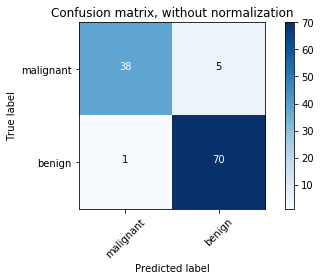

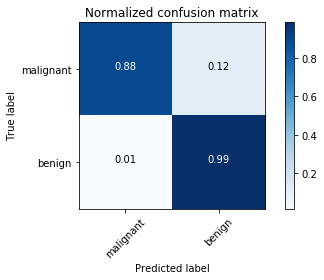

In [9]:
import itertools

# Helper function from Scikit-Learn site to plot and visulaize the confusion matrix

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()


# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, y_pred)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=breast_cancer_data.target_names,
                      title='Confusion matrix, without normalization')

# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=breast_cancer_data.target_names, normalize=True,
                      title='Normalized confusion matrix')

plt.show()

# Visualizing Decision Trees

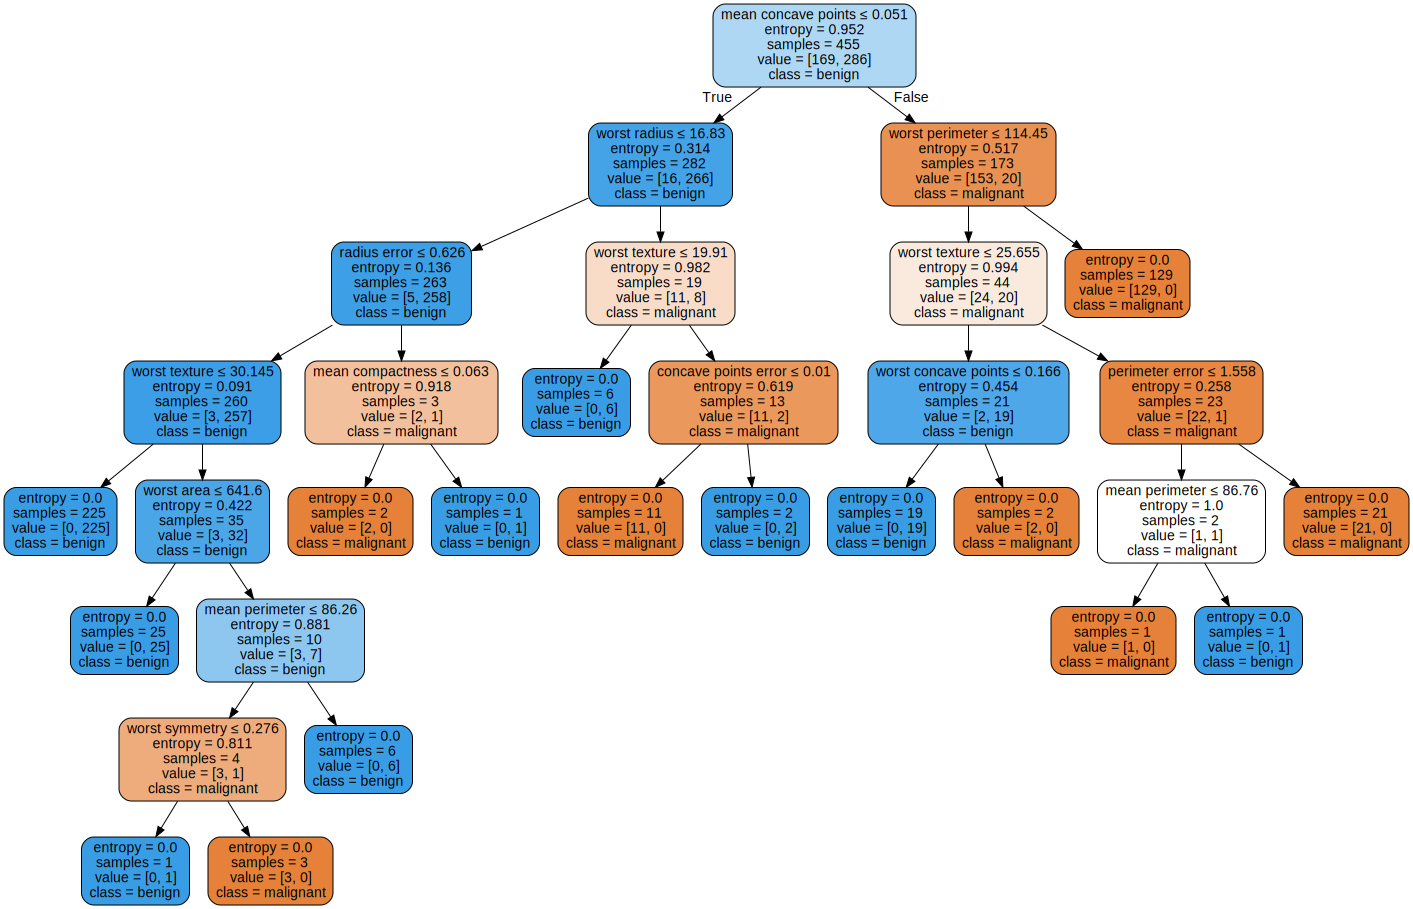

In [10]:
import graphviz 
dot_data = tree.export_graphviz(classifier, out_file=None) 
graph = graphviz.Source(dot_data) 
graph.render("breast_cancer") 

dot_data = tree.export_graphviz(classifier, out_file=None, feature_names=breast_cancer_data.feature_names, 
                                class_names=breast_cancer_data.target_names,  
                                filled=True, rounded=True, special_characters=True)  
graph = graphviz.Source(dot_data)  
graph

# Random Forest Model

In [42]:
# Importing the model
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

# Initiating the model
rf_model = RandomForestClassifier(n_estimators=15, criterion='entropy')

rf_model.fit(X_train, y_train)

y_pred = rf_model.predict(X_test)

print("The accuracy of the model on the test set is %s" % round(accuracy_score(y_true, y_pred) * 100, 3))

scores = cross_val_score(rf_model, X_train, y_train, scoring='accuracy' ,cv=10).mean()

print("The mean accuracy with 10 fold cross validation is %s" % round(scores*100,2))

The accuracy of the model on the test set is 97.368
The mean accuracy with 10 fold cross validation is 95.79
